In [1]:
%conda install matplotlib -y
%conda install xgboost -y
%pip install graphviz
%conda install graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==


In [2]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Preprocessing 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
print(f"Training X: {X_train}\n Training Y: {y_train}")

학습용 X: [[ 6.74501145e-01  1.06445364e-01  9.90221459e-01  7.90590793e-01]
 [-5.37177559e-01 -1.24957601e-01  4.21564419e-01  3.96171883e-01]
 [-7.79513300e-01  1.03205722e+00 -1.28440670e+00 -1.31297673e+00]
 [ 3.10997534e-01 -1.24957601e-01  6.49027235e-01  7.90590793e-01]
 [ 6.74501145e-01 -5.87763531e-01  1.04708716e+00  1.31648267e+00]
 [-7.79513300e-01 -8.19166497e-01  8.03701950e-02  2.64698913e-01]
 [-1.73673948e-01  1.72626612e+00 -1.17067529e+00 -1.18150376e+00]
 [ 1.89829664e-01 -8.19166497e-01  7.62758643e-01  5.27644853e-01]
 [ 6.86617933e-02 -1.24957601e-01  2.50967307e-01  3.96171883e-01]
 [-5.25060772e-02 -1.05056946e+00  1.37235899e-01  1.75297293e-03]
 [ 1.15917263e+00 -1.24957601e-01  9.90221459e-01  1.18500970e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [ 1.28034050e+00  1.06445364e-01  7.62758643e-01  1.44795564e+00]
 [-1.02184904e+00  1.03205722e+00 -1.22754100e+00 -7.87084847e-01]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31

## Random Forest

In [5]:
# Training and Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [6]:
print(f"{classifier.feature_importances_}")

[0.12085028 0.02518501 0.37444914 0.47951557]


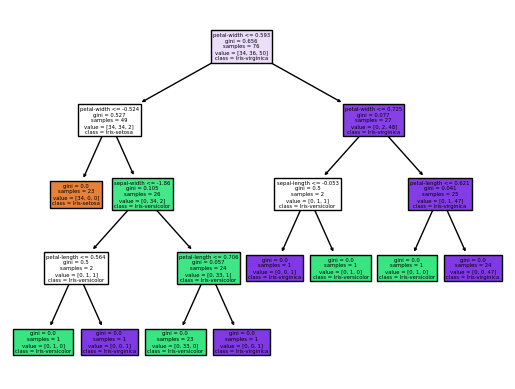

In [7]:
from sklearn import tree

for tree_in_forest in classifier.estimators_:
    tree.plot_tree(tree_in_forest,
               feature_names = list(dataset.columns[:-1]), 
               class_names=list(dataset['Class'].drop_duplicates()),
               filled = True)

## XGBoost

In [8]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


XGBoost only allows a numeric class, so it needs to be changed
- Iris-setosa <=> 0
- Iris-versicolor <=> 1
- Iris-virginica <=> 2

In [9]:
def int2str(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else:
        return 2

dataset['Class'] = dataset['Class'].apply(int2str)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Preprocessing 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print(f"Training X: {X_train}\n Training Y: {y_train}")

Training X: [[ 6.74501145e-01  1.06445364e-01  9.90221459e-01  7.90590793e-01]
 [-5.37177559e-01 -1.24957601e-01  4.21564419e-01  3.96171883e-01]
 [-7.79513300e-01  1.03205722e+00 -1.28440670e+00 -1.31297673e+00]
 [ 3.10997534e-01 -1.24957601e-01  6.49027235e-01  7.90590793e-01]
 [ 6.74501145e-01 -5.87763531e-01  1.04708716e+00  1.31648267e+00]
 [-7.79513300e-01 -8.19166497e-01  8.03701950e-02  2.64698913e-01]
 [-1.73673948e-01  1.72626612e+00 -1.17067529e+00 -1.18150376e+00]
 [ 1.89829664e-01 -8.19166497e-01  7.62758643e-01  5.27644853e-01]
 [ 6.86617933e-02 -1.24957601e-01  2.50967307e-01  3.96171883e-01]
 [-5.25060772e-02 -1.05056946e+00  1.37235899e-01  1.75297293e-03]
 [ 1.15917263e+00 -1.24957601e-01  9.90221459e-01  1.18500970e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [ 1.28034050e+00  1.06445364e-01  7.62758643e-01  1.44795564e+00]
 [-1.02184904e+00  1.03205722e+00 -1.22754100e+00 -7.87084847e-01]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 

In [12]:
# Training and Predictions
import xgboost as xgb
import matplotlib.pyplot as plt

classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

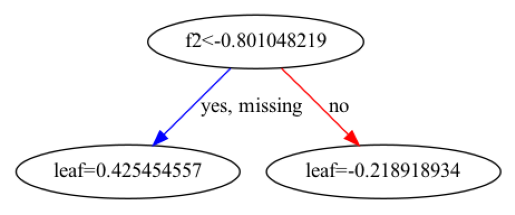

In [13]:
xgb.plot_tree(classifier)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

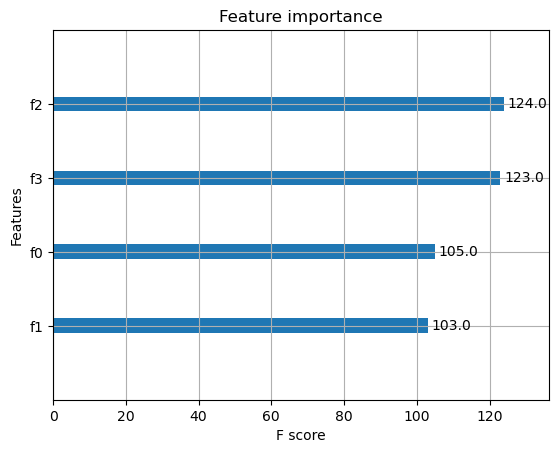

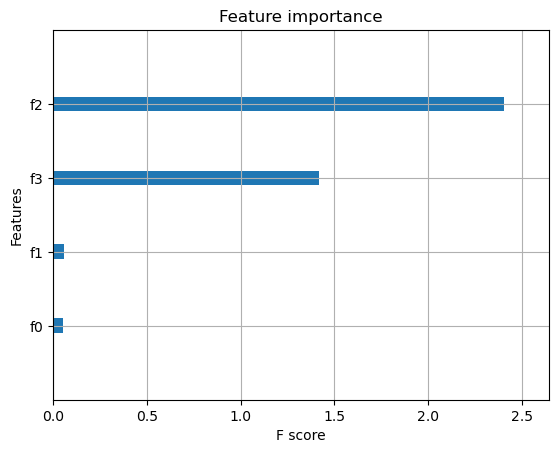

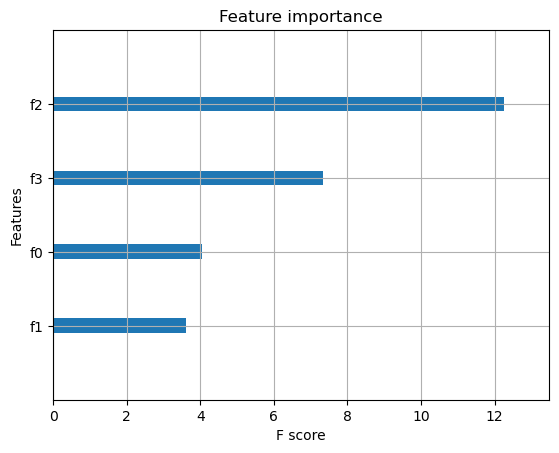

In [14]:
xgb.plot_importance(classifier, importance_type='weight')
xgb.plot_importance(classifier, importance_type='gain', show_values=False)
xgb.plot_importance(classifier, importance_type='cover', show_values=False)

## Practice

### Random Forest Practice
The following is data on cancer patients. Use Random Forest and XGBoost, respectively, to classify with at least 90% accuracy, and indicate feature importance.

In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

raw = datasets.load_breast_cancer()

example = pd.DataFrame(data=raw.data, columns=raw.feature_names)
example["label"] = raw.target

example.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
compact_columns_names = ['worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 'worst symmetry', 'worst fractal dimension']

train, test = train_test_split(example, test_size=.2, random_state=2)
train_X = train[compact_columns_names]
train_Y = train["label"]

test_X = test[compact_columns_names]
test_Y = test["label"]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_X, train_Y)

rf_accuracy = rf_classifier.score(test_X, test_Y)

print(f"Random Forest Accuracy: {rf_accuracy}")

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_X, train_Y)

xgb_accuracy = xgb_classifier.score(test_X, test_Y)

print(f"XGBoost Accuracy: {xgb_accuracy}")

Random Forest Accuracy: 0.9473684210526315
XGBoost Accuracy: 0.9298245614035088


In [21]:
print(f"Random Forest feature importance: {rf_classifier.feature_importances_}")

Random Forest feature importance: [0.50233343 0.11283835 0.08112512 0.19504137 0.05853507 0.05012667]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

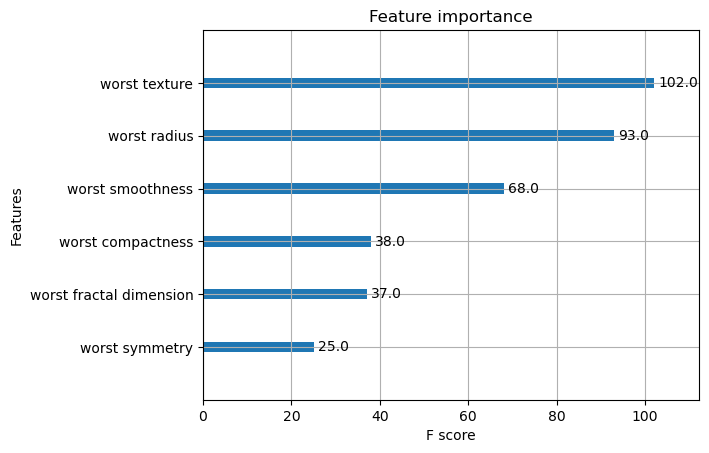

In [18]:
xgb.plot_importance(xgb_classifier)